In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [152]:
X = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27]])
y = np.array([[1,16,81]])

In [160]:
class LinearRegression:
    def __init__(self, alpha= 0.001, n_iters = 100):
        self.n_iters_ = n_iters
        self.alpha_ = alpha
    
    def fit(self, X, y):
        train_size = X.shape[0]
        # Adding bias term
        X = np.column_stack((np.ones(train_size), X))
        # Coeficients
        self.coef_ = np.zeros((X.shape[1], 1))
        cost = []
        for epoch in range(self.n_iters_):
            # Linear form
            h_x = np.dot(X, self.coef_)
            # Cost function
            J = (1./(2 * train_size)) * np.sum(np.power((h_x - y.T), 2))
            # Gradient descent            
            self.coef_ = self.coef_ - self.alpha_ * ((1./train_size) *  np.transpose(X).dot(h_x - y.T))
            cost.append(J)
            
        return self.coef_, cost
    
    def predict(self, X):
        train_size = X.shape[0]
        # Adding bias term
        X = np.column_stack((np.ones(train_size), X))
        return np.dot(X, self.coef_)

In [163]:
lr = LinearRegression()
theta, cost = lr.fit(X, y)
lr.predict(np.array([[3, 9, 27]]))

array([[78.42540932]])

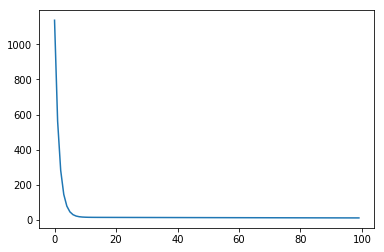

In [164]:
plt.plot(cost)
plt.show()